In [1]:
# 用于数据处理
import numpy as np
import pandas as pd
# 用于获取数据
import akshare as ak
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
# 导入画图库、设置主题和中文显示
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.sans-serif'] = ['SimHei'] # 中文显示
plt.rcParams['axes.unicode_minus'] = False   # 负数显示
# 设置忽略警告
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

C:\Users\yunji\AppData\Local\Temp\ipykernel_11500\3650300891.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


                                datetime    open    high     low   close  \
datetime                                                                   
2019-12-16 14:09:00  2019-12-16 14:09:00  7080.0  7080.0  7080.0  7080.0   
2019-12-16 14:10:00  2019-12-16 14:10:00  7080.0  7080.0  7080.0  7080.0   
2019-12-16 14:11:00  2019-12-16 14:11:00  7080.0  7080.0  7080.0  7080.0   
2019-12-16 14:12:00  2019-12-16 14:12:00  7080.0  7080.0  7080.0  7080.0   
2019-12-16 14:13:00  2019-12-16 14:13:00  7080.0  7080.0  7080.0  7080.0   

                     volume  
datetime                     
2019-12-16 14:09:00     4.0  
2019-12-16 14:10:00     0.0  
2019-12-16 14:11:00     0.0  
2019-12-16 14:12:00     0.0  
2019-12-16 14:13:00     0.0  


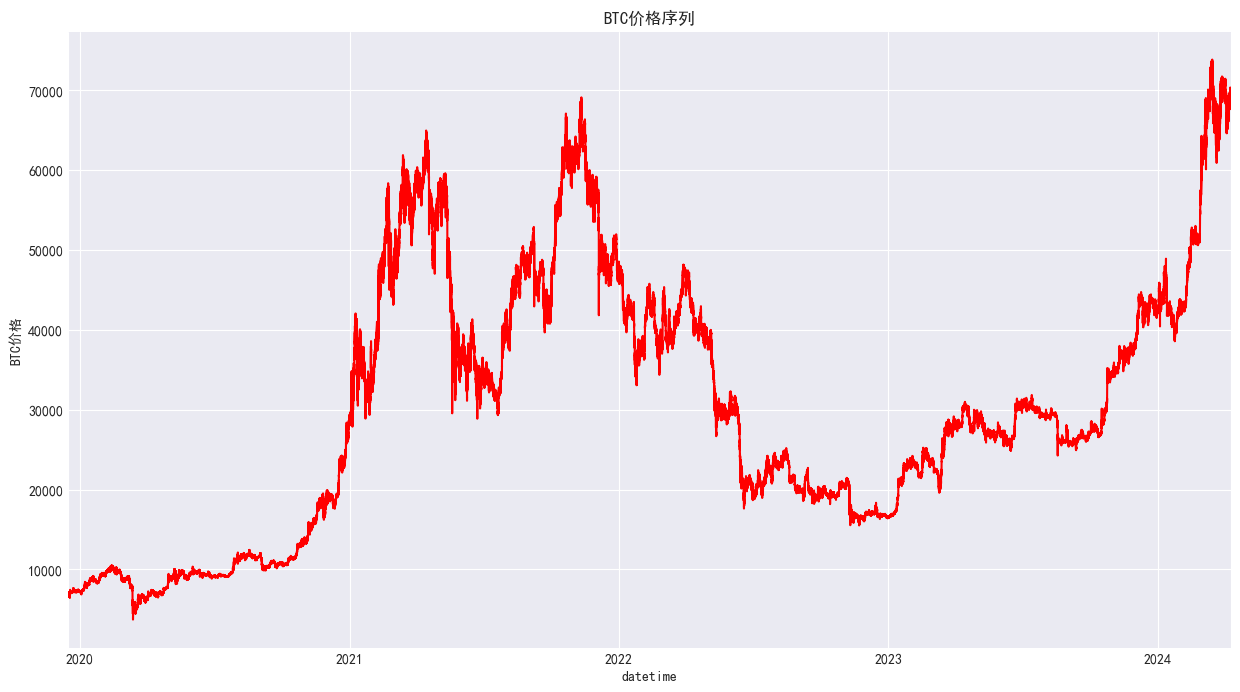

In [2]:
# 获取黄金ETF的历史行情数据
data = pd.read_pickle('../data/BTC.pkl.gz', compression='gzip')
data.index = pd.to_datetime(data['datetime'])
data[['open', 'high', 'low', 'close', 'volume']] = data[['open', 'high', 'low', 'close', 'volume']].astype(float)
print(data.head())

# 画出黄金ETF的价格走势图
data['close'].plot(figsize=(15, 8), color='red')
plt.ylabel('BTC价格')
plt.title('BTC价格序列')
plt.show()


In [99]:
def run_fix(short_ma, long_ma):
    predict_price = []
    Df = data[['close']]
    Df.columns = ['Close']
    # 计算均线因子
    Df['S1'] = Df['Close'].rolling(window=short_ma).mean()
    Df['S2'] = Df['Close'].rolling(window=long_ma).mean()
    # 第二天的收盘价
    Df['next_day_price'] = Df['Close'].shift(-1)
    Df = Df.dropna()

    # 定义解释变量
    X = Df[['S1', 'S2']]
    # 定义因变量
    y = Df['next_day_price']
    # 将数据划分为训练集和测试集
    t = int(0.8 * Df.shape[0])
    # 循环训练
    for i in range(len(Df)-t):
        # 创建线性回归模型并训练
        linear = LinearRegression(fit_intercept=True).fit(X.iloc[i:t+i],y.iloc[i:t+i].values)
        X_test = X.iloc[t+i:t+i+1,]
        predicted_price = linear.predict(X_test.values)
        # print(X_test, type(X_test), predicted_price, type(predicted_price))
        predict_price.append(float(predicted_price))
    y_test = y.iloc[t:,::]
    y_test = pd.DataFrame(y_test)
    y_test['predict_price'] = predicted_price
    y_test['close'] = y_test['next_day_price'].shift(1)
    y_test['price_miss_rate'] = (y_test['predict_price']-y_test['next_day_price'])/y_test['close']
    y_test['is_hit'] = np.where((y_test['price_miss_rate']>-0.0002)&(y_test['price_miss_rate']<0.0002),1,0)
    y_test['direction_wrong_rate'] = np.where((y_test['next_day_price']-y_test['close'])*(y_test['predict_price']-y_test['close'])>0,1,0)
    print("命中率为: ", y_test['is_hit'].sum()/len(y_test))
    print("方向正确率为: ", y_test['direction_wrong_rate'].sum()/len(y_test))

In [ ]:
run_fix(5,10)

In [80]:
for i in range(5,60,5):
    for j in range (5, 60, 5):
        short_ma = i
        long_ma = i+j
        print("short_ma  ", short_ma, "  long_ma  ", long_ma)
        run_fix(short_ma, long_ma)

short_ma   5   long_ma   10
命中率为:  0.3352902790576678
方向正确率为:  0.4848015202888902
short_ma   5   long_ma   15
命中率为:  0.33112873321472586
方向正确率为:  0.4842734850539135
short_ma   5   long_ma   20
命中率为:  0.32842220830871527
方向正确率为:  0.48389536062928246
short_ma   5   long_ma   25
命中率为:  0.32699214056592335
方向正确率为:  0.4836010097113063
short_ma   5   long_ma   30
命中率为:  0.32555104344413727
方向正确率为:  0.4834499574509363
short_ma   5   long_ma   35
命中率为:  0.32510422338969075
方向正确率为:  0.48323937979642545
short_ma   5   long_ma   40
命中率为:  0.32464417361858233
方向正确率为:  0.48323383128450237
short_ma   5   long_ma   45
命中率为:  0.3242965579123043
方向正确率为:  0.48332749106573986
short_ma   5   long_ma   50
命中率为:  0.32389162018563017
方向正确率为:  0.4835468154059834
short_ma   5   long_ma   55
命中率为:  0.3237688744656506
方向正确率为:  0.483618429900196
short_ma   5   long_ma   60
命中率为:  0.32368140250623917
方向正确率为:  0.4836305193259081
short_ma   10   long_ma   15
命中率为:  0.26876059585932005
方向正确率为:  0.4862818757619649
sho

命中率为:  0.13947704925261256
方向正确率为:  0.4900833370078046
short_ma   50   long_ma   55
命中率为:  0.14121815123382622
方向正确率为:  0.49085846438075
short_ma   50   long_ma   60
命中率为:  0.13985158337522158
方向正确率为:  0.49018492552713033
short_ma   50   long_ma   65
命中率为:  0.13832186548556286
方向正确率为:  0.49011325280486434
short_ma   50   long_ma   70
命中率为:  0.13755715564413365
方向正确率为:  0.4900503983809024
short_ma   50   long_ma   75
命中率为:  0.1366733908749187
方向正确率为:  0.48974944056792
short_ma   50   long_ma   80
命中率为:  0.13646204451656144
方向正确率为:  0.48992909802814916
short_ma   50   long_ma   85
命中率为:  0.1357899215799534
方向正确率为:  0.4897978980693721
short_ma   50   long_ma   90
命中率为:  0.13567337328200854
方向正确率为:  0.4899268489490324
short_ma   50   long_ma   95
命中率为:  0.1353165145806372
方向正确率为:  0.4899720226376325
short_ma   50   long_ma   100
命中率为:  0.13475020944486088
方向正确率为:  0.49011640724899685
short_ma   50   long_ma   105
命中率为:  0.1345719268308277
方向正确率为:  0.4901814237431627
short_ma   55   long_ma

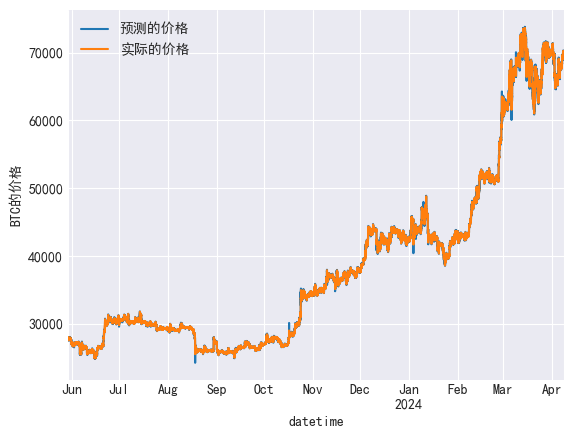

In [73]:
# 预测BTC第二日的价格
y_test[['next_day_price','predict_price']].plot()
plt.legend(['预测的价格', '实际的价格'])
plt.ylabel('BTC的价格')
plt.show()

In [8]:
# 决定系数R2
r2_train = linear.score(X_train, y_train)
r2_test = linear.score(X_test, y_test)
print('训练集决定系数: %.4f' %r2_train)
print('测试集决定系数: %.4f' %r2_test)

训练集决定系数: 0.9999
测试集决定系数: 0.9999


In [ ]:
X_test['']

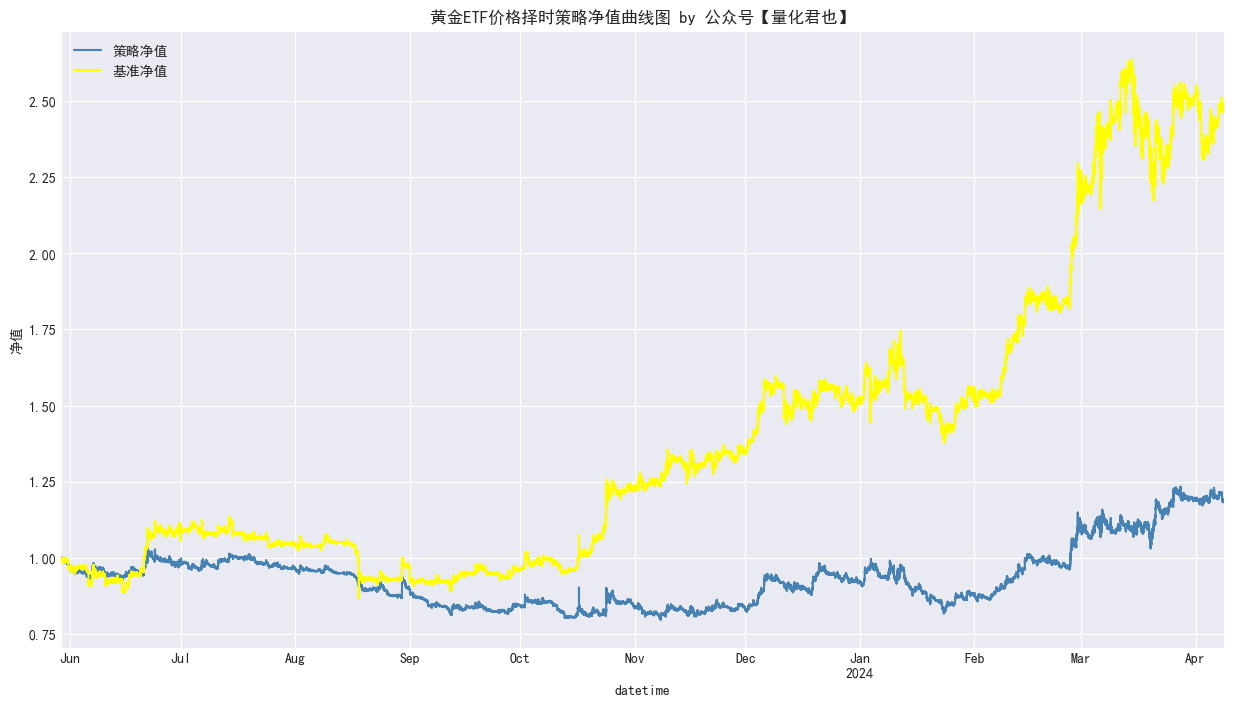

In [9]:
# 只考虑测试集当中的数据
gold = pd.DataFrame()
gold['price'] = Df.iloc[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
# 黄金ETF的日收益率
gold['gold_returns'] = gold['price'].pct_change()
# 如果预测价格比前一个预测的价格高，则买入，否则卖出或空仓
gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day, 1, 0)
# 策略的日收益率
gold['strategy_returns'] = gold['signal'].shift(1) * gold['gold_returns']
# 策略和基准的净值曲线
gold['strategy_nv'] = (gold['strategy_returns'] + 1).cumprod()
gold['bmk_nv'] = (gold['gold_returns'] + 1).cumprod()
# 绘制净值曲线图
gold[['strategy_nv','bmk_nv']].plot(figsize=(15, 8), color=['SteelBlue', 'Yellow'],
                                    title='黄金ETF价格择时策略净值曲线图 by 公众号【量化君也】')
plt.legend(['策略净值', '基准净值'])
plt.ylabel('净值')
plt.show()